# Problem Statement

Parkinson’s Disease (PD) is a degenerative neurological disorder marked by decreased dopamine levels in the brain. It manifests itself through a deterioration of movement, including the presence of tremors and stiffness. There is commonly a marked effect on speech, including dysarthria (difficulty articulating sounds), hypophonia (lowered volume), and monotone (reduced pitch range). Additionally, cognitive impairments and changes in mood can occur, and risk of dementia is increased.

Traditional diagnosis of Parkinson’s Disease involves a clinician taking a neurological history of the patient and observing motor skills in various situations. Since there is no definitive laboratory test to diagnose PD, diagnosis is often difficult, particularly in the early stages when motor effects are not yet severe. Monitoring progression of the disease over time requires repeated clinic visits by the patient. An effective screening process, particularly one that doesn’t require a clinic visit, would be beneficial. Since PD patients exhibit characteristic vocal features, voice recordings are a useful and noninvasive tool for diagnosis. If machine learning algorithms could be applied to a voice recording dataset to accurately diagnosis PD, this would be an effective screening step prior to an appointment with a clinician.

The data for this project is available at https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data .
The data consists of those diagnosed with Parkinson Disease and those who do not.

Study the data

1. Read the column description and ensure you understand each attribute well
2. Split the data into training and test set in the ratio of 70:30 respectively
3. Use the classification algorithms and compare the models to find the best model

In [3]:
# Import csv and check the file's data

import pandas as pd
import numpy as np

# Import csv
parkinsons_df = pd.read_csv("parkinsons.csv")
parkinsons_df.head(5)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [4]:
# Attribute(s)

parkinsons_df.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

# Attribute information (from https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.names)

Matrix column entries (attributes):

name - ASCII subject name and recording number

MDVP:Fo(Hz) - Average vocal fundamental frequency

MDVP:Fhi(Hz) - Maximum vocal fundamental frequency

MDVP:Flo(Hz) - Minimum vocal fundamental frequency

MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several measures of variation in fundamental frequency

MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude

NHR,HNR - Two measures of ratio of noise to tonal components in the voice

status - Health status of the subject (one) - Parkinson's, (zero) - healthy

RPDE,D2 - Two nonlinear dynamical complexity measures

DFA - Signal fractal scaling exponent

spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation 

In [5]:
parkinsons_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


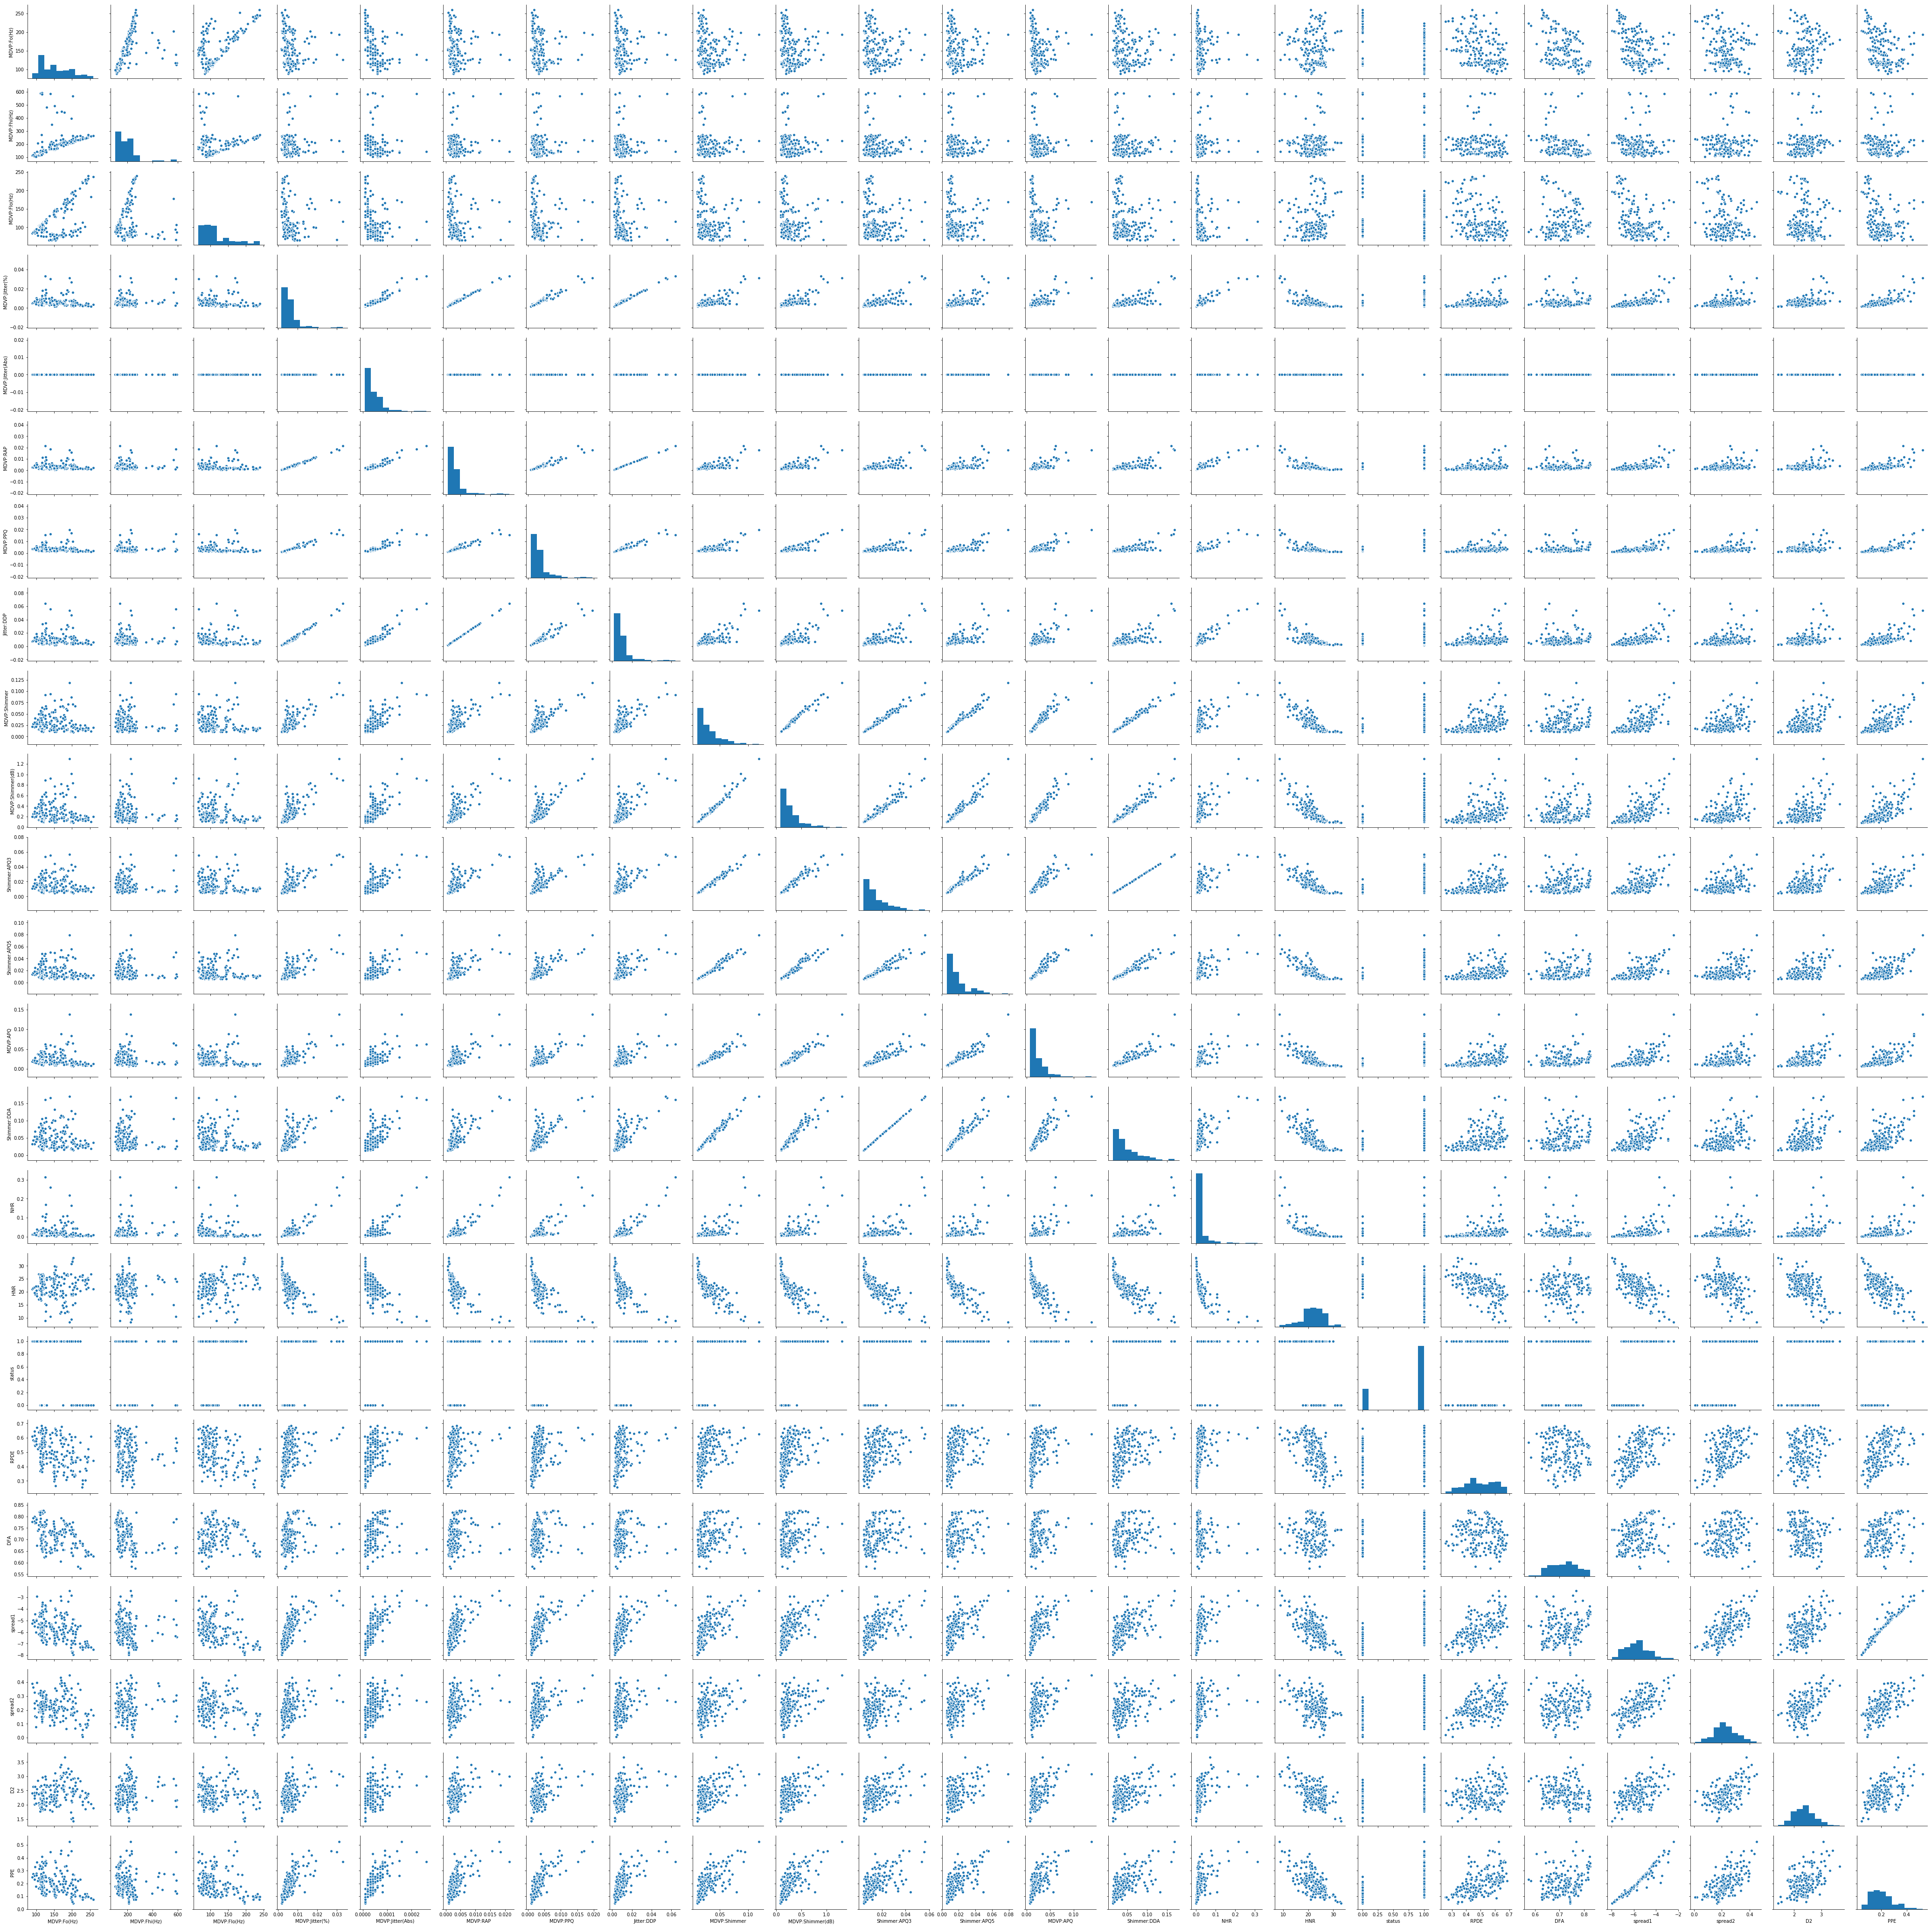

In [6]:
# Pairplot using sns
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

sns.pairplot(parkinsons_df)

# Analyzing each attribute

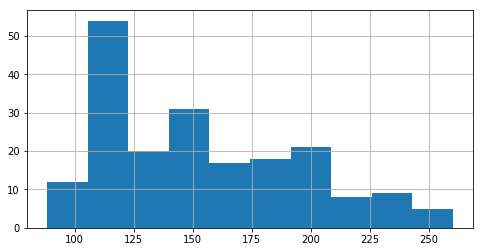

In [7]:
%matplotlib inline
parkinsons_df["MDVP:Fo(Hz)"].hist(figsize=(8, 4))

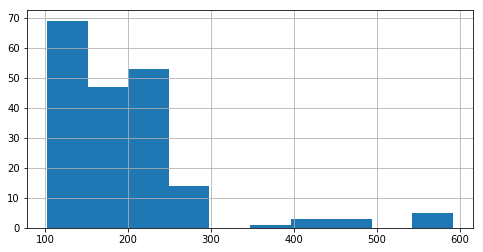

In [8]:
parkinsons_df["MDVP:Fhi(Hz)"].hist(figsize=(8, 4))

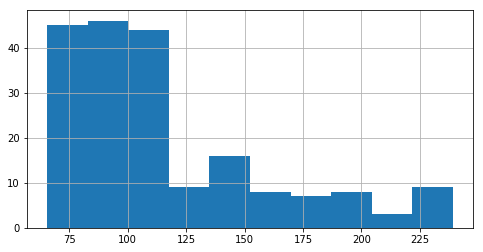

In [9]:
parkinsons_df["MDVP:Flo(Hz)"].hist(figsize=(8, 4))

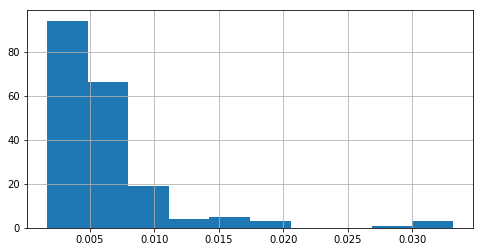

In [10]:
parkinsons_df["MDVP:Jitter(%)"].hist(figsize=(8, 4))

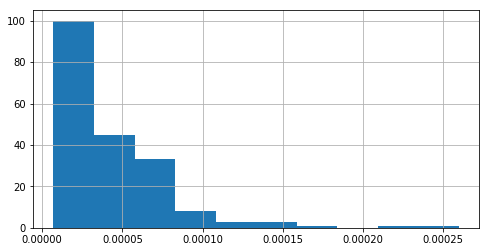

In [11]:
parkinsons_df["MDVP:Jitter(Abs)"].hist(figsize=(8, 4))

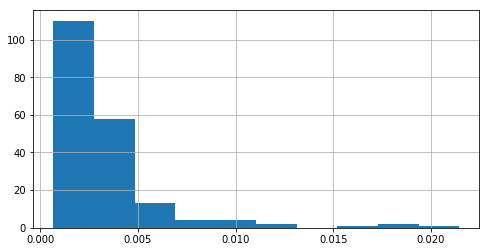

In [12]:
parkinsons_df["MDVP:RAP"].hist(figsize=(8, 4))

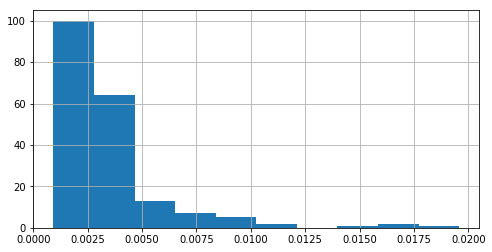

In [13]:
parkinsons_df["MDVP:PPQ"].hist(figsize=(8, 4))

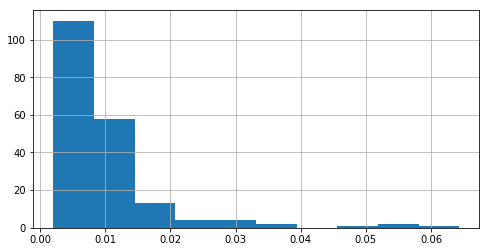

In [14]:
parkinsons_df["Jitter:DDP"].hist(figsize=(8, 4))

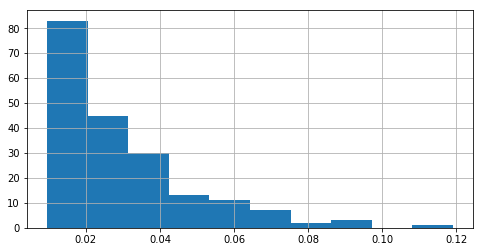

In [15]:
parkinsons_df["MDVP:Shimmer"].hist(figsize=(8, 4))

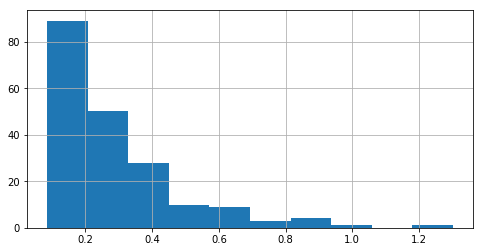

In [16]:
parkinsons_df["MDVP:Shimmer(dB)"].hist(figsize=(8, 4))

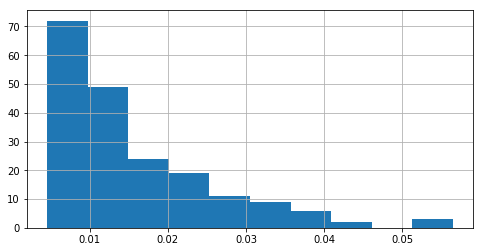

In [17]:
parkinsons_df["Shimmer:APQ3"].hist(figsize=(8, 4))

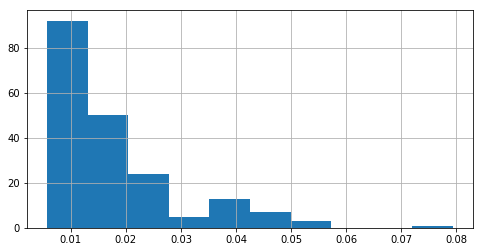

In [18]:
parkinsons_df["Shimmer:APQ5"].hist(figsize=(8, 4))

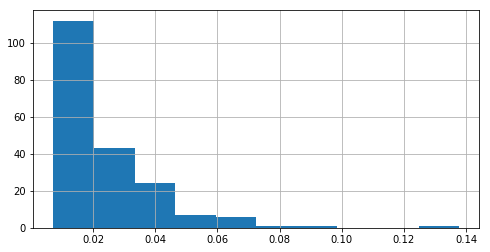

In [19]:
parkinsons_df["MDVP:APQ"].hist(figsize=(8, 4))

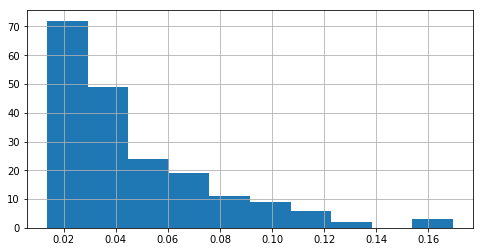

In [20]:
parkinsons_df["Shimmer:DDA"].hist(figsize=(8, 4))

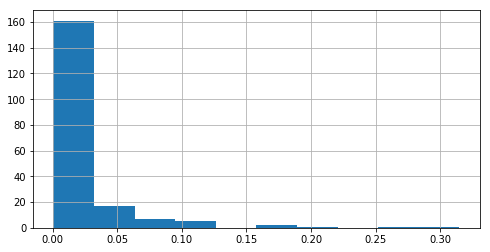

In [21]:
parkinsons_df["NHR"].hist(figsize=(8, 4))

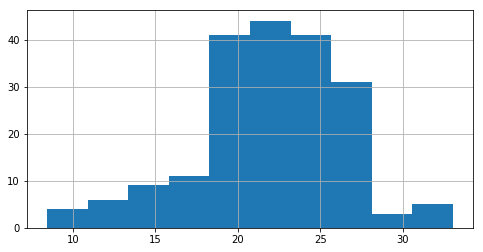

In [22]:
parkinsons_df["HNR"].hist(figsize=(8, 4))

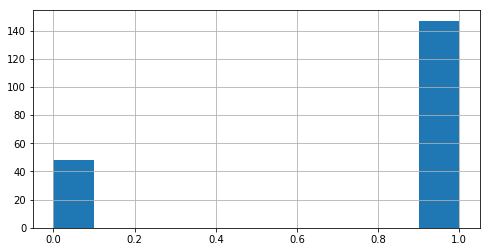

In [23]:
parkinsons_df["status"].hist(figsize=(8, 4))

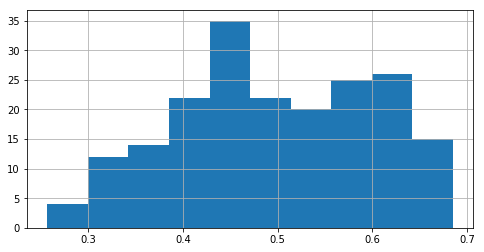

In [24]:
parkinsons_df["RPDE"].hist(figsize=(8, 4))

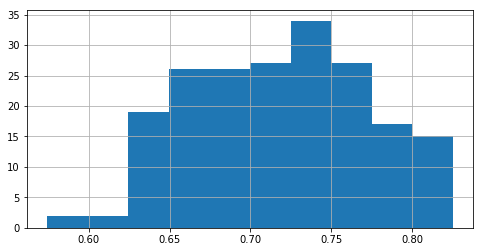

In [25]:
parkinsons_df["DFA"].hist(figsize=(8, 4))

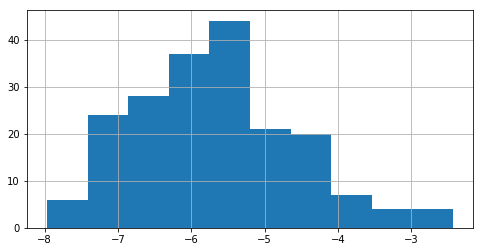

In [26]:
parkinsons_df["spread1"].hist(figsize=(8, 4))

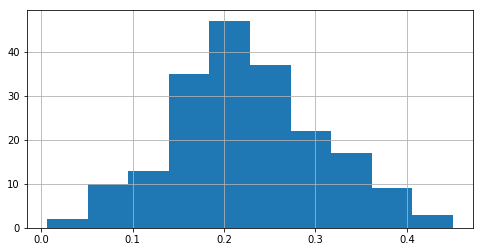

In [27]:
parkinsons_df["spread2"].hist(figsize=(8, 4))

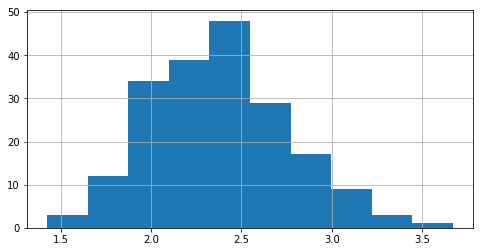

In [28]:
parkinsons_df["D2"].hist(figsize=(8, 4))

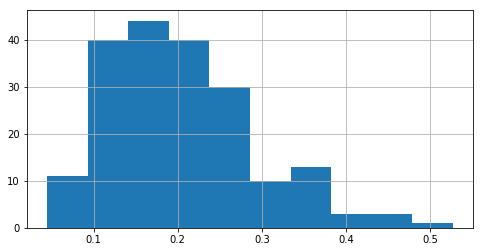

In [29]:
parkinsons_df["PPE"].hist(figsize=(8, 4))

In [30]:
# Default is Pearson correlation
import matplotlib.pyplot as plt
parkinsons_df.corr().style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),1.0,0.4,0.6,-0.12,-0.38,-0.076,-0.11,-0.076,-0.098,-0.074,-0.095,-0.071,-0.078,-0.095,-0.022,0.059,-0.38,-0.38,-0.45,-0.41,-0.25,0.18,-0.37
MDVP:Fhi(Hz),0.4,1.0,0.085,0.1,-0.029,0.097,0.091,0.097,0.0023,0.043,-0.0037,-0.01,0.0049,-0.0037,0.16,-0.025,-0.17,-0.11,-0.34,-0.077,-0.003,0.18,-0.07
MDVP:Flo(Hz),0.6,0.085,1.0,-0.14,-0.28,-0.1,-0.096,-0.1,-0.14,-0.12,-0.15,-0.1,-0.11,-0.15,-0.11,0.21,-0.38,-0.4,-0.05,-0.39,-0.24,-0.1,-0.34
MDVP:Jitter(%),-0.12,0.1,-0.14,1.0,0.94,0.99,0.97,0.99,0.77,0.8,0.75,0.73,0.76,0.75,0.91,-0.73,0.28,0.36,0.099,0.69,0.39,0.43,0.72
MDVP:Jitter(Abs),-0.38,-0.029,-0.28,0.94,1.0,0.92,0.9,0.92,0.7,0.72,0.7,0.65,0.65,0.7,0.83,-0.66,0.34,0.44,0.18,0.74,0.39,0.31,0.75
MDVP:RAP,-0.076,0.097,-0.1,0.99,0.92,1.0,0.96,1.0,0.76,0.79,0.74,0.71,0.74,0.74,0.92,-0.72,0.27,0.34,0.064,0.65,0.32,0.43,0.67
MDVP:PPQ,-0.11,0.091,-0.096,0.97,0.9,0.96,1.0,0.96,0.8,0.84,0.76,0.79,0.8,0.76,0.84,-0.73,0.29,0.33,0.2,0.72,0.41,0.41,0.77
Jitter:DDP,-0.076,0.097,-0.1,0.99,0.92,1.0,0.96,1.0,0.76,0.79,0.74,0.71,0.74,0.74,0.92,-0.72,0.27,0.34,0.064,0.65,0.32,0.43,0.67
MDVP:Shimmer,-0.098,0.0023,-0.14,0.77,0.7,0.76,0.8,0.76,1.0,0.99,0.99,0.98,0.95,0.99,0.72,-0.84,0.37,0.45,0.16,0.65,0.45,0.51,0.69
MDVP:Shimmer(dB),-0.074,0.043,-0.12,0.8,0.72,0.79,0.84,0.79,0.99,1.0,0.96,0.97,0.96,0.96,0.74,-0.83,0.35,0.41,0.17,0.65,0.45,0.51,0.7


In [31]:
parkinsons_df.corr()["status"]
#There is no strong correlation between any two variables.
#There is no strong correlation between any independent variable and class variable.

MDVP:Fo(Hz)        -0.383535
MDVP:Fhi(Hz)       -0.166136
MDVP:Flo(Hz)       -0.380200
MDVP:Jitter(%)      0.278220
MDVP:Jitter(Abs)    0.338653
MDVP:RAP            0.266668
MDVP:PPQ            0.288698
Jitter:DDP          0.266646
MDVP:Shimmer        0.367430
MDVP:Shimmer(dB)    0.350697
Shimmer:APQ3        0.347617
Shimmer:APQ5        0.351148
MDVP:APQ            0.364316
Shimmer:DDA         0.347608
NHR                 0.189429
HNR                -0.361515
status              1.000000
RPDE                0.308567
DFA                 0.231739
spread1             0.564838
spread2             0.454842
D2                  0.340232
PPE                 0.531039
Name: status, dtype: float64

In [32]:
#Data Exploration

#Number of patients
n_patients = parkinsons_df.shape[0]

#Number of features
n_features = parkinsons_df.shape[1]-1

#With Parkinsons
n_parkinsons = parkinsons_df[parkinsons_df['status'] == 1].shape[0]

#Without Parkinsons
n_healthy = parkinsons_df[parkinsons_df['status'] == 0].shape[0]

#Result Output
print ("Total number of patients: ",n_patients)
print ("Number of features: ", n_features)
print ("Number of patients with Parkinsons: ", n_parkinsons)
print ("Number of patients without Parkinsons: ", n_healthy)

Total number of patients:  195
Number of features:  23
Number of patients with Parkinsons:  147
Number of patients without Parkinsons:  48


In [33]:
#Preparing the Data

# Extract feature columns
feature_cols = list(parkinsons_df.columns[1:16]) + list(parkinsons_df.columns[18:])
target_col = parkinsons_df.columns[17]

# Show the list of columns
print ("Feature columns: ", feature_cols)
print ("\nTarget column: ", target_col)

# Separate the data into feature data and target data (X_all and y_all, respectively)
X_all = parkinsons_df[feature_cols]
y_all = parkinsons_df[target_col]

Feature columns:  ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE']

Target column:  status


In [34]:
# Training libraries 

from sklearn import linear_model
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import average_precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn import neighbors

In [35]:
# Training and Testing Data Split
num_all = parkinsons_df.shape[0] 
num_train = 136 # about 70% of the data
num_test = num_all - num_train

# Select features and corresponding labels for training/test sets

X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=num_test,random_state=5)

# Naive Bayes

In [36]:
clf = GaussianNB()
clf.fit(X_train,y_train)
GaussianNB(priors=None)
Y_pred = clf.predict(X_test)
accuracy_score(y_test, Y_pred, normalize = True)

0.7627118644067796

In [37]:
# calculate accuracy measures and confusion matrix
from sklearn import metrics
print(metrics.classification_report(y_test,Y_pred))

             precision    recall  f1-score   support

          0       0.54      0.94      0.68        16
          1       0.97      0.70      0.81        43

avg / total       0.85      0.76      0.78        59



# Support Vector Machines

## RBF

In [38]:
model = svm.SVC(kernel = 'rbf', C = 10,gamma=0.0001)
model.fit(X_train,y_train)
y_svmr = model.predict(X_test)
accuracy_score(y_test, y_svmr)

0.7796610169491526

In [39]:
# calculate accuracy measures and confusion matrix
from sklearn import metrics
print(metrics.classification_report(y_test,y_svmr))

             precision    recall  f1-score   support

          0       0.62      0.50      0.55        16
          1       0.83      0.88      0.85        43

avg / total       0.77      0.78      0.77        59



## POLY

In [40]:
model = svm.SVC(kernel = 'poly', C = 10,gamma=0.0001)
model.fit(X_train,y_train)
y_svmp = model.predict(X_test)
accuracy_score(y_test, y_svmp)

0.8813559322033898

In [41]:
# calculate accuracy measures and confusion matrix
from sklearn import metrics
print(metrics.classification_report(y_test,y_svmp))

             precision    recall  f1-score   support

          0       1.00      0.56      0.72        16
          1       0.86      1.00      0.92        43

avg / total       0.90      0.88      0.87        59



## LINEAR

In [42]:
model = svm.SVC(kernel = 'linear', C = 10,gamma=0.0001)
model.fit(X_train,y_train)
y_svml = model.predict(X_test)
accuracy_score(y_test, y_svml)

0.847457627118644

In [43]:
# calculate accuracy measures and confusion matrix
from sklearn import metrics
print(metrics.classification_report(y_test,y_svml))

             precision    recall  f1-score   support

          0       0.89      0.50      0.64        16
          1       0.84      0.98      0.90        43

avg / total       0.85      0.85      0.83        59



# KNN

## Neighbours =1 

In [44]:
knn = NNH = KNeighborsClassifier(n_neighbors= 1 , weights = 'uniform', metric='euclidean')
knn.fit(X_train, y_train)
y_knn1 = knn.predict(X_test)
accuracy_score(y_test, y_knn1)

0.847457627118644

In [45]:
# calculate accuracy measures and confusion matrix
from sklearn import metrics
print(metrics.classification_report(y_test,y_knn1))

             precision    recall  f1-score   support

          0       0.68      0.81      0.74        16
          1       0.93      0.86      0.89        43

avg / total       0.86      0.85      0.85        59



## Neighbours = 3

In [46]:
knn = NNH = KNeighborsClassifier(n_neighbors= 3 , weights = 'uniform', metric='euclidean')
knn.fit(X_train, y_train)
y_knn3 = knn.predict(X_test)
accuracy_score(y_test, y_knn1)

0.847457627118644

In [47]:
# calculate accuracy measures and confusion matrix
from sklearn import metrics
print(metrics.classification_report(y_test,y_knn3))

             precision    recall  f1-score   support

          0       0.75      0.56      0.64        16
          1       0.85      0.93      0.89        43

avg / total       0.82      0.83      0.82        59



## Neighbours = 5

In [48]:
knn = NNH = KNeighborsClassifier(n_neighbors= 5 , weights = 'uniform', metric='euclidean')
knn.fit(X_train, y_train)
y_knn5 = knn.predict(X_test)
accuracy_score(y_test, y_knn1)

0.847457627118644

In [49]:
# calculate accuracy measures and confusion matrix
from sklearn import metrics
print(metrics.classification_report(y_test,y_knn5))

             precision    recall  f1-score   support

          0       0.78      0.44      0.56        16
          1       0.82      0.95      0.88        43

avg / total       0.81      0.81      0.79        59



# Logistic Regression

In [50]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_lr = lr.predict(X_test)
accuracy_score(y_test, y_lr)

0.847457627118644

In [51]:
# calculate accuracy measures and confusion matrix
from sklearn import metrics
print(metrics.classification_report(y_test,y_lr))

             precision    recall  f1-score   support

          0       0.89      0.50      0.64        16
          1       0.84      0.98      0.90        43

avg / total       0.85      0.85      0.83        59



# DecisionTreeClassifier

## Without regularization

In [73]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion = 'entropy')
dt_model.fit(X_train, y_train)
dt_model.score(X_test , y_test)
y_pred = dt_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.8813559322033898

In [53]:
# calculate accuracy measures and confusion matrix
from sklearn import metrics
print(metrics.classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.85      0.69      0.76        16
          1       0.89      0.95      0.92        43

avg / total       0.88      0.88      0.88        59



## With regularization

In [74]:
dt_model = DecisionTreeClassifier(criterion = 'entropy',max_depth = 3, min_samples_leaf=5 )
dt_model.fit(X_train, y_train)
dt_model.score(X_test , y_test)
y_pred = dt_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.847457627118644

In [55]:
# calculate accuracy measures and confusion matrix
from sklearn import metrics
print(metrics.classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.67      0.62      0.65        16
          1       0.86      0.88      0.87        43

avg / total       0.81      0.81      0.81        59



# RandomForestClassifier

## Without regularization

In [56]:
from sklearn.ensemble import RandomForestClassifier

randomforest_model = RandomForestClassifier()
randomforest_model.fit(X_train, y_train)
predicted_random=randomforest_model.predict(X_test)
randomforest_model.score(X_test , y_test)

0.8813559322033898

In [57]:
# calculate accuracy measures and confusion matrix
from sklearn import metrics
print(metrics.classification_report(y_test,predicted_random))

             precision    recall  f1-score   support

          0       0.80      0.75      0.77        16
          1       0.91      0.93      0.92        43

avg / total       0.88      0.88      0.88        59



## With regularization

In [58]:
randomforest_model = RandomForestClassifier(max_depth=5, random_state=0, n_estimators = 50)
randomforest_model.fit(X_train, y_train)
predicted_random=randomforest_model.predict(X_test)
randomforest_model.score(X_test , y_test)

0.8813559322033898

In [59]:
# calculate accuracy measures and confusion matrix
from sklearn import metrics
print(metrics.classification_report(y_test,predicted_random))

             precision    recall  f1-score   support

          0       0.91      0.62      0.74        16
          1       0.88      0.98      0.92        43

avg / total       0.88      0.88      0.87        59



In [60]:
### Choosing the best model with K-Fold Validation

from sklearn.model_selection import KFold # import KFold

kf = KFold(n_splits=20) # Define the split - into 20 folds 
kf.get_n_splits(X_all) # returns the number of splitting iterations in the cross-validator


X = X_all.as_matrix()
y = y_all.as_matrix()


best=0
for train_index, test_index in kf.split(X_all):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    bg = RandomForestClassifier(max_depth=5, random_state=0, n_estimators = 50)
    bg.fit(X_train,y_train)
    y_pred = bg.predict(X_test)
    if(best < accuracy_score(y_test, y_pred)):
        best = accuracy_score(y_test, y_pred)
        best_model = bg

print("best accuracy of Random Forest is after k-fold validation  =" +str(best))


best accuracy of Random Forest is after k-fold validation  =1.0


In [61]:
# Accuracy of the best model with 70:30 split data.

# Training and Testing Data Split
num_all = parkinsons_df.shape[0] 
num_train = 136 # about 70% of the data
num_test = num_all - num_train

# Select features and corresponding labels for training/test sets

X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=num_test,random_state=5)

y_pred=best_model.predict(X_test)
best = accuracy_score(y_test, y_pred)
print(best)

1.0


In [62]:

print(metrics.classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        16
          1       1.00      1.00      1.00        43

avg / total       1.00      1.00      1.00        59



# Conclusion

RandomForest is performing the best with 100% accuracy.
There is no need of the another ensemble when the RandomForest is doing 100%.

In [77]:
from jakgraph import gclassifier
clf = gclassifier.gclassifier(1000)
print(clf)
clf.fit(X_train.as_matrix(),y_train.as_matrix())
y_pred = clf.predict(X_test.as_matrix())
accuracy_score(y_test, y_pred)

num of bins=1000
gclassifier(nbins=1000)
2


0.8135593220338984

In [78]:
print(metrics.classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.86      0.38      0.52        16
          1       0.81      0.98      0.88        43

avg / total       0.82      0.81      0.79        59



In [79]:
clf = gclassifier.gclassifier(10000)
print(clf)
clf.fit(X_train.as_matrix(),y_train.as_matrix())
y_pred = clf.predict(X_test.as_matrix())
accuracy_score(y_test, y_pred)

num of bins=10000
gclassifier(nbins=10000)
2


0.8135593220338984

In [80]:
from sklearn.ensemble import BaggingClassifier

bg = BaggingClassifier(gclassifier.gclassifier(1000),max_samples=0.5,n_estimators=5)
print(bg)
bg.fit(X_train,y_train)

num of bins=1000
BaggingClassifier(base_estimator=gclassifier(nbins=1000), bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=0.5,
         n_estimators=5, n_jobs=1, oob_score=False, random_state=None,
         verbose=0, warm_start=False)
num of bins=1000
2
num of bins=1000
2
num of bins=1000
2
num of bins=1000
2
num of bins=1000
2


BaggingClassifier(base_estimator=gclassifier(nbins=1000), bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=0.5,
         n_estimators=5, n_jobs=1, oob_score=False, random_state=None,
         verbose=0, warm_start=False)

In [81]:
y_pred = bg.predict(X_test.as_matrix())
accuracy_score(y_test, y_pred)

0.8135593220338984

In [82]:
### Choosing the best model with K-Fold Validation

from sklearn.model_selection import KFold # import KFold

kf = KFold(n_splits=20) # Define the split - into 20 folds 
kf.get_n_splits(X_all) # returns the number of splitting iterations in the cross-validator


X = X_all.as_matrix()
y = y_all.as_matrix()


best=0
for train_index, test_index in kf.split(X_all):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    bg =  gclassifier.gclassifier(10000)
    bg.fit(X_train,y_train)
    y_pred = bg.predict(X_test)
    if(best < accuracy_score(y_test, y_pred)):
        best = accuracy_score(y_test, y_pred)
        best_model = bg

print("best accuracy of Random Forest is after k-fold validation  =" +str(best))


num of bins=10000
2
num of bins=10000
2
num of bins=10000
2
num of bins=10000
2
num of bins=10000
2
num of bins=10000
2
num of bins=10000
2
num of bins=10000
2
num of bins=10000
2
num of bins=10000
2
num of bins=10000
2
num of bins=10000
2
num of bins=10000
2
num of bins=10000
2
num of bins=10000
2
num of bins=10000
2
num of bins=10000
2
num of bins=10000
2
num of bins=10000
2
num of bins=10000
2
best accuracy of Random Forest is after k-fold validation  =1.0


In [85]:
# Accuracy of the best model with 70:30 split data.

# Training and Testing Data Split
num_all = parkinsons_df.shape[0] 
num_train = 136 # about 70% of the data
num_test = num_all - num_train

# Select features and corresponding labels for training/test sets

X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=num_test,random_state=5)

y_pred=best_model.predict(X_test.as_matrix())
best = accuracy_score(y_test, y_pred)
print(best)

0.9830508474576272
